In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  statsmodels.api as sm
import  statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from ydata_profiling import ProfileReport

In [2]:
data = pd.read_csv('salary.csv')
data

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [4]:
#change data type
data['age'] = data['age'].astype('int32')
data['experience'] = data['experience'].astype('int32')
data['income'] = data['income'].astype('int32')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int32
 1   experience  20 non-null     int32
 2   income      20 non-null     int32
dtypes: int32(3)
memory usage: 368.0 bytes


In [6]:
data.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [7]:
data[data.duplicated()]
#we dont have duplicate values 

,age,experience,income


In [8]:
data[data.isna().any(axis = 1)]
# we dont have null values as well


,age,experience,income


In [9]:
data.corr()

,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


Text(0.5, 1.0, 'heatmap of data')

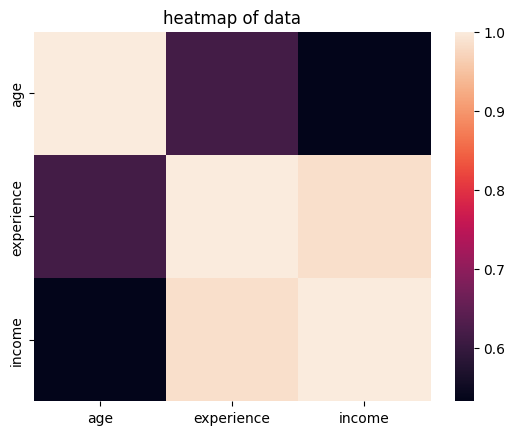

In [10]:
sns.heatmap(data.corr())
plt.title("heatmap of data")


In [11]:
pr  = ProfileReport(data)
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

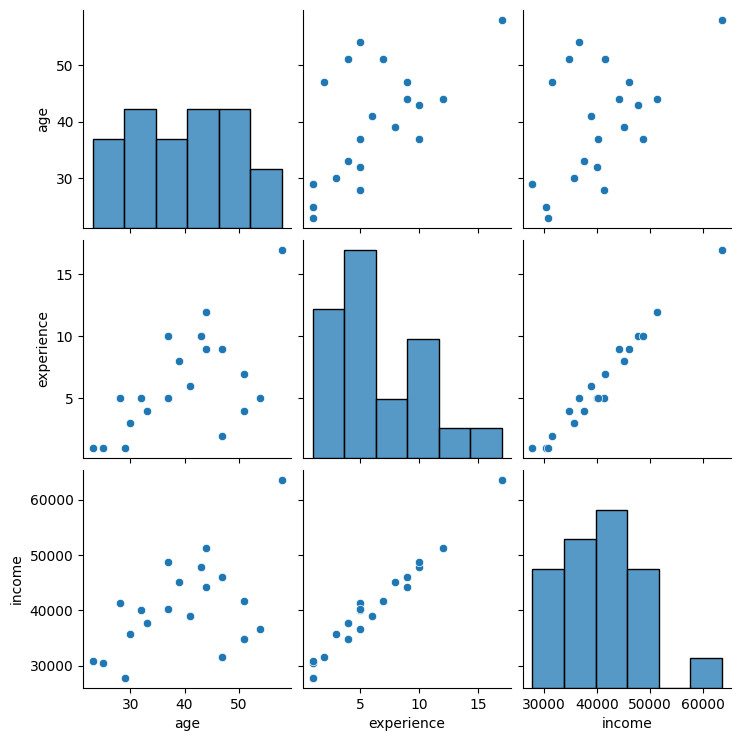

In [12]:
sns.pairplot(data = data)

<AxesSubplot: >

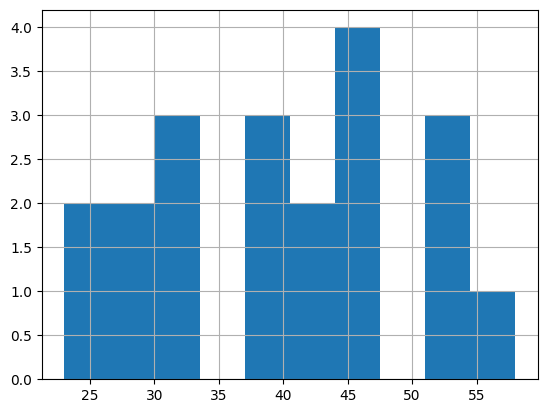

In [13]:
data['age'].hist()

<AxesSubplot: >

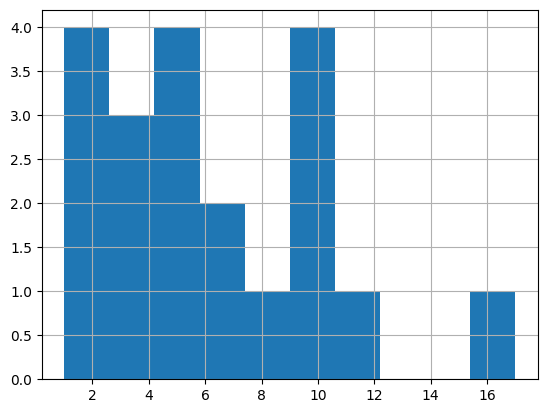

In [14]:
data['experience'].hist()

<AxesSubplot: >

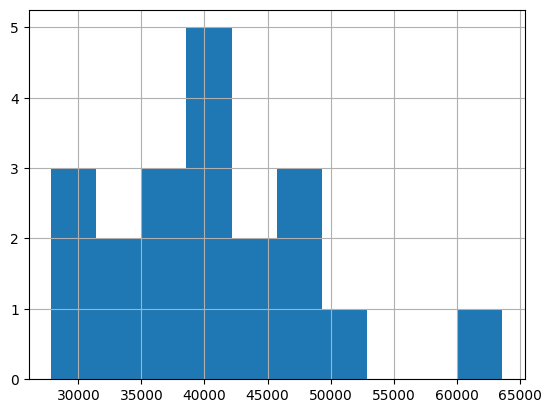

In [15]:
data['income'].hist()

<AxesSubplot: >

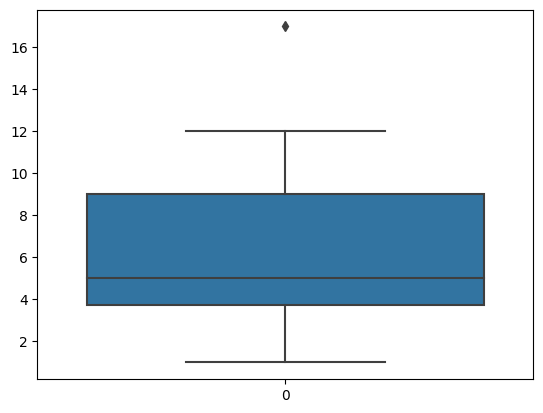

In [16]:
sns.boxplot(data['experience'])

<AxesSubplot: >

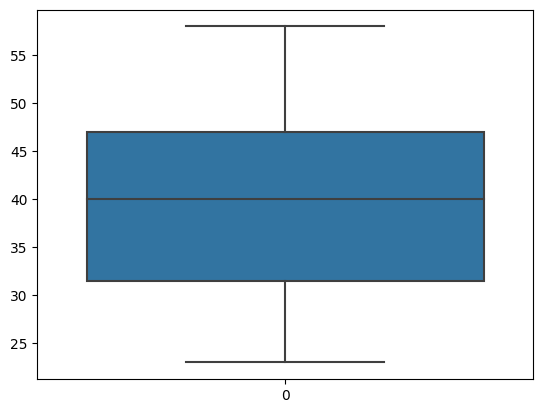

In [17]:
sns.boxplot(data['age'])

# create model 


In [18]:
data_copy = data.copy()

In [19]:
data_copy

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int32
 1   experience  20 non-null     int32
 2   income      20 non-null     int32
dtypes: int32(3)
memory usage: 368.0 bytes


In [21]:
model1 = smf.ols('income~age+experience', data = data).fit() # all values from the table
model1.params

Intercept     31261.689854
age             -99.195355
experience     2162.404192
dtype: float64

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     366.5
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.05e-14
Time:                        16:36:29   Log-Likelihood:                -170.81
No. Observations:                  20   AIC:                             347.6
Df Residuals:                      17   BIC:                             350.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.126e+04   1306.437     23.929      0.000    2.85e+04     3.4e+04
age          -99.1954     38.979     -2.545      0.021    -181.433     -16.958
experience  2162.4042     94.770     22.817      0.000    1962.457    2362.351
==============================================================================
Omnibus:                        0.799   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.695
Skew:                          -0.404   Prob(JB):                        0.707
Kurtosis:                       2.575   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
 # here we got the r squared value is .97 which is good sign 
# here we got the p value for age and experience is greater than 0.05


## lets check colinearity problem

In [24]:
rsq_age = smf.ols('age~experience', data = data).fit().rsquared
vif_age = 1/(1-rsq_age)
rsq_experience = smf.ols('experience~age', data = data).fit().rsquared
vif_experience = 1/(1-rsq_experience)


In [25]:
vif_val = {'veriables':['age','experience'],'vif_value':[vif_age, vif_experience]}
vif_dataframe = pd.DataFrame(vif_val)
vif_dataframe

,veriables,vif_value
0,age,1.608825
1,experience,1.608825


In [26]:
# vif values are less than 5 --> there is no colinearity problem 

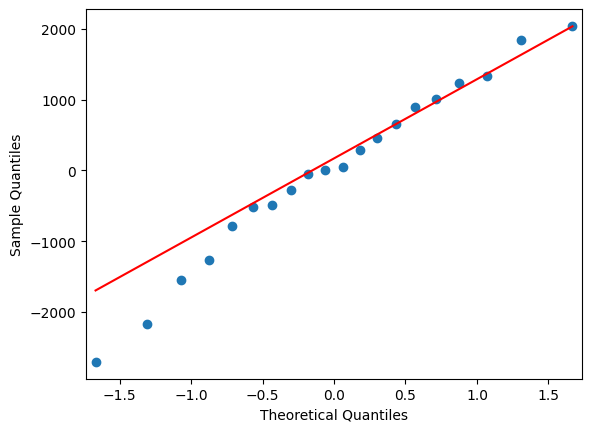

In [27]:
sm.qqplot(model1.resid, line = 'q')
plt.show()

In [28]:
list(np.where(model1.resid< -2000))

[array([10, 18], dtype=int64)]

In [29]:
data = data.drop(data.index[[10,18]], axis = 0).reset_index (drop= True)
data

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [30]:
model2 = smf.ols('income~age+experience', data = data).fit() # after deleting two records 


In [31]:
model2.summary()

C:\Users\Rohit\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     508.9
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.64e-14
Time:                        16:36:30   Log-Likelihood:                -149.36
No. Observations:                  18   AIC:                             304.7
Df Residuals:                      15   BIC:                             307.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.195e+04   1066.540     29.956      0.000    2.97e+04    3.42e+04
age         -106.5241     31.013     -3.435      0.004    -172.626     -40.422
experience  2142.9080     77.013     27.825      0.000    1978.758    2307.058
==============================================================================
Omnibus:                        0.644   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.725   Jarque-Bera (JB):                0.618
Skew:                           0.053   Prob(JB):                        0.734
Kurtosis:                       2.098   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# here we can say that accuracy is increased by dropping the 

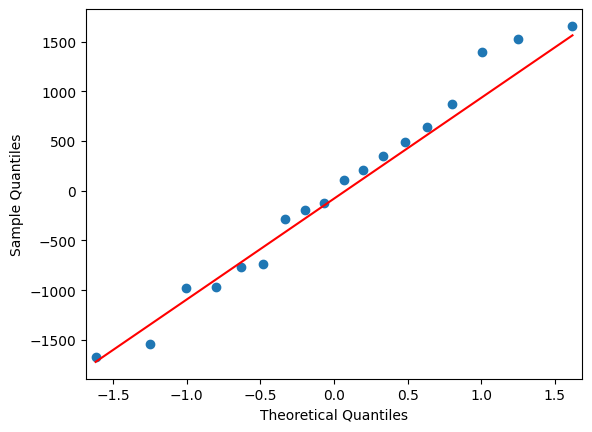

In [33]:
sm.qqplot(model2.resid, line = 'q')
plt.show()

In [34]:
def standard(vals):
    return (vals - vals.mean())/vals.std()


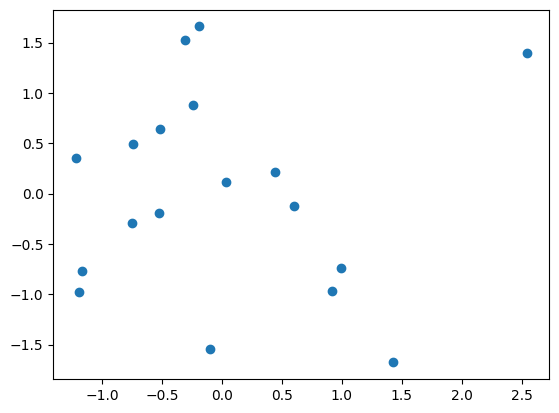

In [35]:
plt.scatter(standard(model2.fittedvalues), standard(model2.resid))
plt.show()

In [36]:
#points are splitted widely , no  U shape or funnel shape, so there is no problem

eval_env: 1


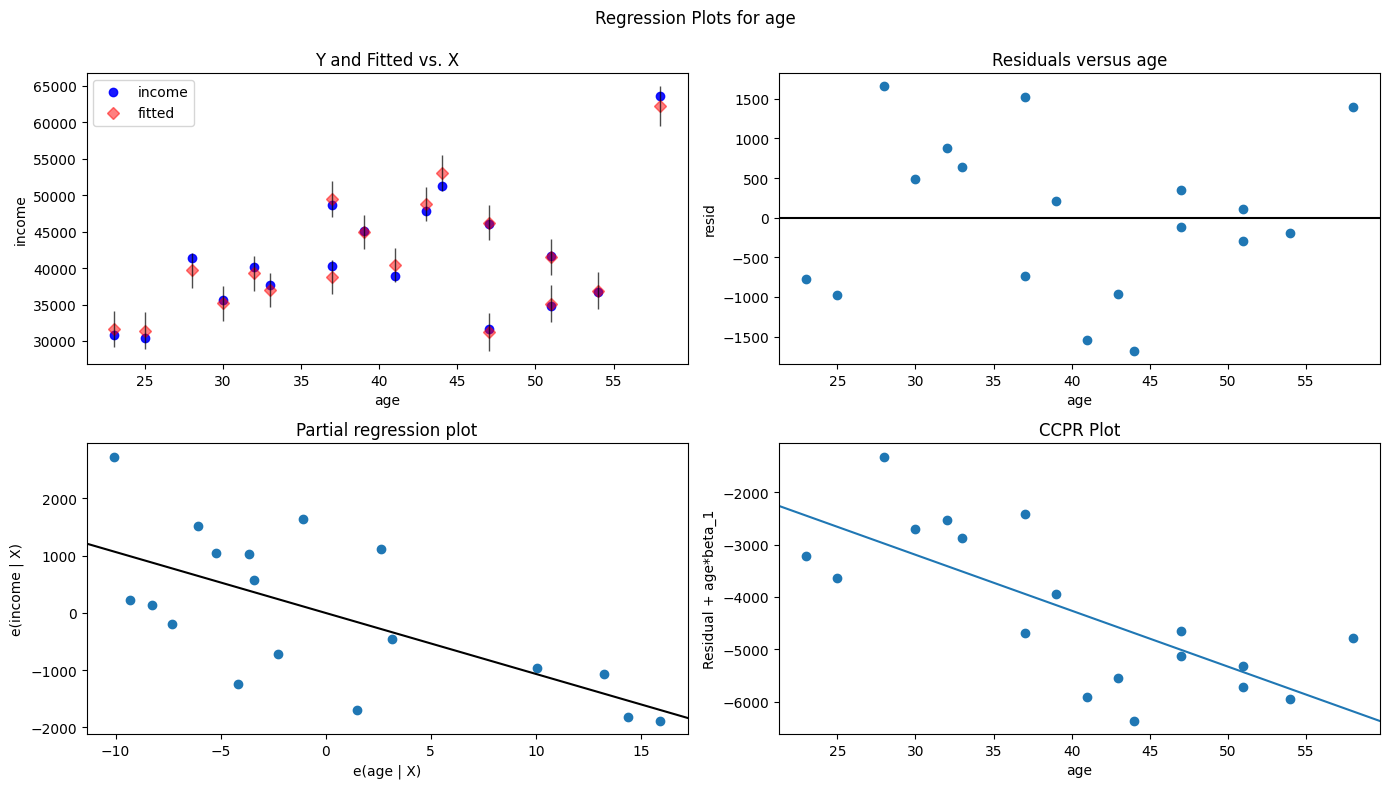

In [37]:
fig  =  plt.figure(figsize = (14,8))

sm.graphics.plot_regress_exog(model2, 'age', fig = fig)
plt.show()



eval_env: 1


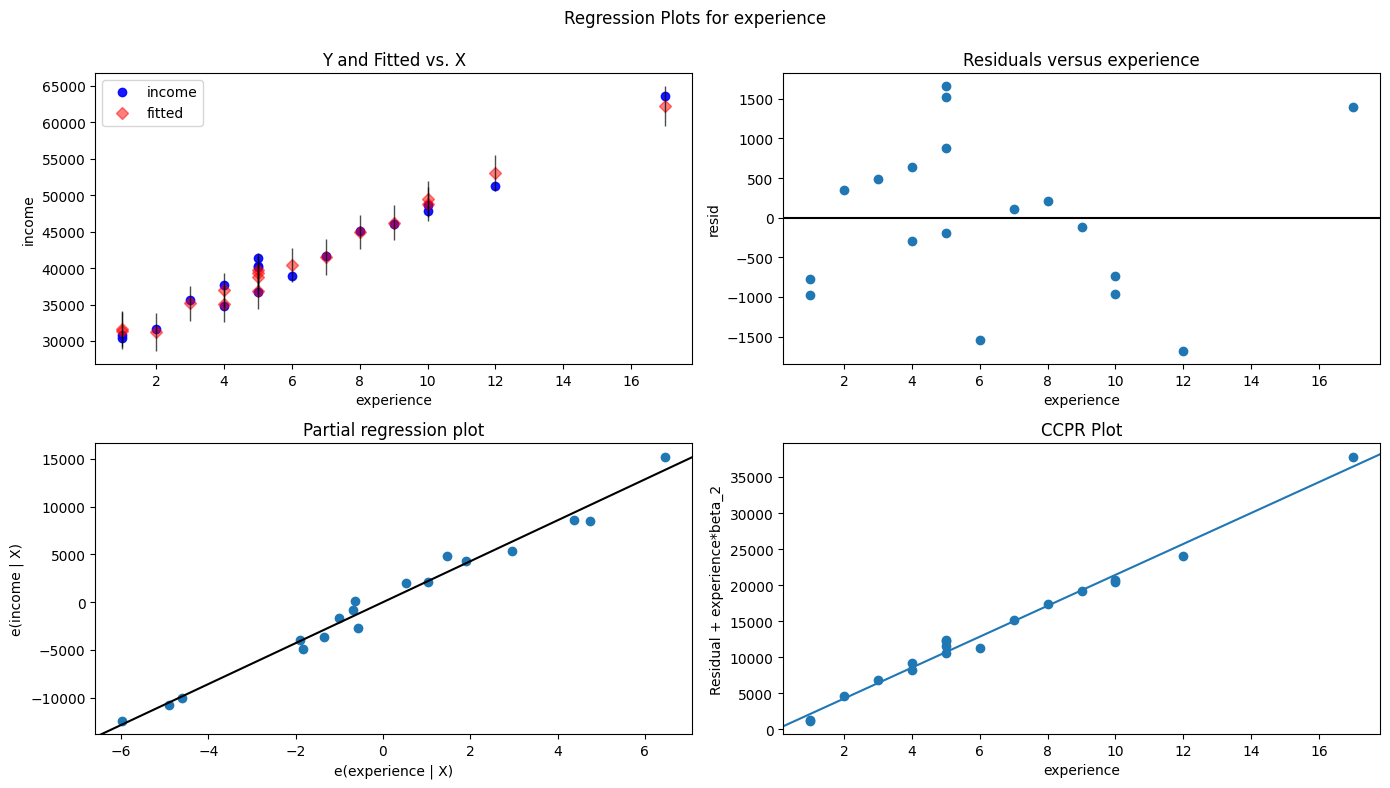

In [38]:
sm.graphics.plot_regress_exog(model2, 'experience', fig = plt.figure(figsize = (14,8)))
plt.show()

# checking outliers 


In [39]:
(c, _) = model2.get_influence().cooks_distance

In [40]:
c

array([8.79527869e-02, 1.05115507e-02, 1.83878569e-02, 2.54974531e-02,
       3.68280593e-02, 7.31188647e-04, 1.65017918e-01, 1.25255912e-02,
       4.90156166e-02, 1.15906684e-03, 4.43200399e-04, 5.71135556e-03,
       1.08231157e-02, 2.24678090e-01, 4.53822670e-02, 8.90770113e-01,
       6.70802811e-02, 3.63797679e-02])

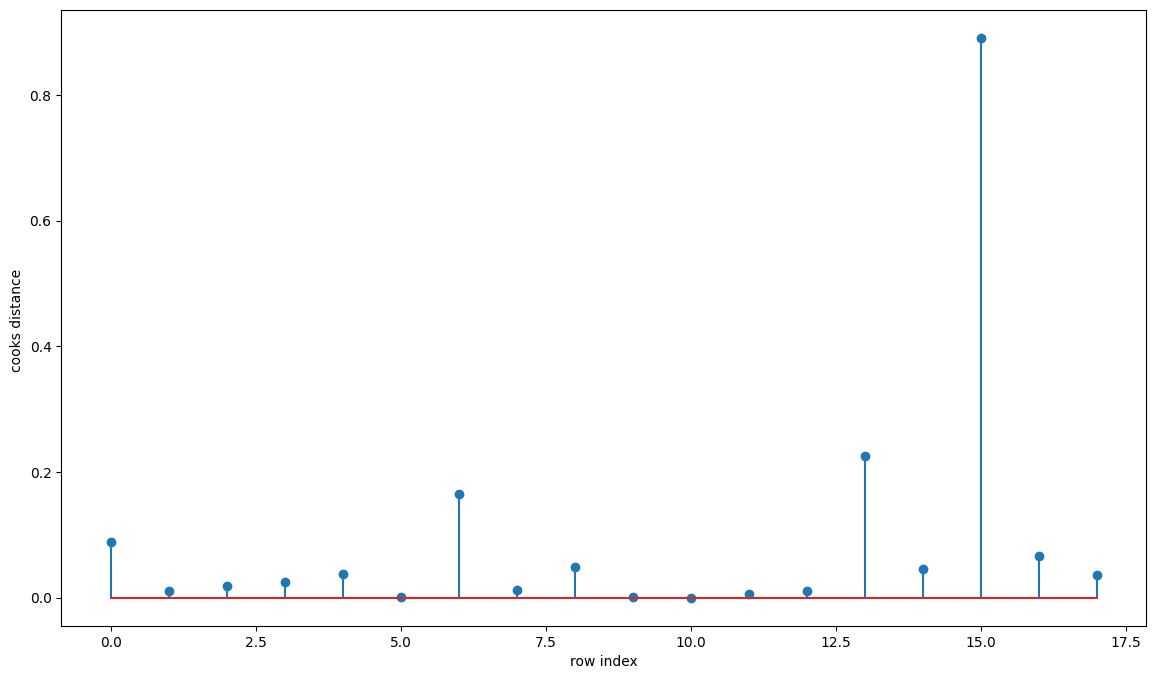

In [41]:
plt.figure(figsize = (14,8))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel("row index")
plt.ylabel("cooks distance ")
plt.show()

In [42]:
np.argmax(c), np.max(c)

(15, 0.890770113153141)

In [43]:
# lets calculate leverage cut off
k = data.shape[1]
n = data.shape[0]
leverage  = (3*(k+1))/n
leverage

0.6666666666666666

In [54]:
data_copy[data_copy.index.isin([15])]

,age,experience,income
15,41,6,38900


In [85]:
# we can cut down the value which is greater than the leverage value (0.666)
data = data.drop(data.index[15]).reset_index(drop = True)
data

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [55]:
data_copy = data_copy.drop(data_copy.index[15], axis = 0 ).reset_index(drop = True)
data_copy

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [56]:
final_model = smf.ols('income~ age+ experience', data = data_copy ).fit()

In [57]:
final_model.summary()

C:\Users\Rohit\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     364.7
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           4.51e-14
Time:                        16:43:11   Log-Likelihood:                -162.22
No. Observations:                  19   AIC:                             330.4
Df Residuals:                      16   BIC:                             333.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.128e+04   1308.899     23.896      0.000    2.85e+04    3.41e+04
age          -97.3355     39.096     -2.490      0.024    -180.216     -14.455
experience  2158.7936     95.014     22.721      0.000    1957.372    2360.215
==============================================================================
Omnibus:                        1.384   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                0.897
Skew:                          -0.521   Prob(JB):                        0.639
Kurtosis:                       2.786   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     366.5
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.05e-14
Time:                        16:36:34   Log-Likelihood:                -170.81
No. Observations:                  20   AIC:                             347.6
Df Residuals:                      17   BIC:                             350.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.126e+04   1306.437     23.929      0.000    2.85e+04     3.4e+04
age          -99.1954     38.979     -2.545      0.021    -181.433     -16.958
experience  2162.4042     94.770     22.817      0.000    1962.457    2362.351
==============================================================================
Omnibus:                        0.799   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.695
Skew:                          -0.404   Prob(JB):                        0.707
Kurtosis:                       2.575   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model2.summary()

C:\Users\Rohit\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     508.9
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.64e-14
Time:                        16:36:34   Log-Likelihood:                -149.36
No. Observations:                  18   AIC:                             304.7
Df Residuals:                      15   BIC:                             307.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.195e+04   1066.540     29.956      0.000    2.97e+04    3.42e+04
age         -106.5241     31.013     -3.435      0.004    -172.626     -40.422
experience  2142.9080     77.013     27.825      0.000    1978.758    2307.058
==============================================================================
Omnibus:                        0.644   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.725   Jarque-Bera (JB):                0.618
Skew:                           0.053   Prob(JB):                        0.734
Kurtosis:                       2.098   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# in this situation model2 gives more accuracy and p values are less than 0.05 so we chooose model2 for prediction 



In [61]:
sample = pd.DataFrame({'age': 24,'experience':3}, index=[1])
sample

,age,experience
1,24,3


In [62]:
model2.predict(sample)

1    35821.359103
dtype: float64

In [63]:
prediction = model2.predict(data_copy)
prediction

0     31429.018972
1     35182.214428
2     31228.396505
3     39254.982221
4     48797.757030
5     41516.840101
6     39681.078672
7     37005.550099
8     38722.361658
9     44938.037462
10    31002.922521
11    46228.752571
12    36911.451745
13    35088.116073
14    52977.048936
15    62200.251408
16    31642.067197
17    46548.324908
18    49436.901706
dtype: float64